In [1]:

# Artificial Neural Network
# Part 1 - Import Data and Extract input 'x' and output 'y'

# Pip or Conda Install these libraries in the Terminal
# Install Theano (U. Montreal, GPU or CPU parallel Float Point computation)
# Install Tensorflow (Google, same as above)
# Install Keras (Combines the above 2 libraries with a high-level API)

# Numpy is a high speed Math computation library
import numpy as np

# Matplotlib is used for plotting graphs
import matplotlib.pyplot as plt

# Pandas is a database analysis tool
import pandas as pd

# LabelEncoder is used to encode binary categorical data into numbers (male/female -> 0/1)
# OneHotEncoder is used to encode categorical data with more than 2 possible options (France, Spain, Germany)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Management column after converting to categorical label in dataset
from sklearn.compose import ColumnTransformer

# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Feature Scaling eases computation by standardizing input data
from sklearn.preprocessing import StandardScaler


# Your CSV data URL link goes here
data_url = 'https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Database-Prediction/master/Data/Bank_Customer_Data.csv'

# Importing the dataset
dataset = pd.read_csv(data_url)

# Display data to make sure it has been imported
display(dataset)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
# Extract input Independent Variable (Matrix of Features and Observations)
# Row number, customer ID, and name are not useful, so they're excluded
x = dataset.iloc[:, 3:13]

print('X input values:')
display(x)

X input values:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [3]:
# Extract output Dependant Variables. The last column shows whether a customer left of stayed with the bank
y = dataset.iloc[:, 13]

print('Y output values:')
display(y)

Y output values:


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [4]:
# Use the '.values' method to convert data from Pandas Dataframes to NumPy arrays
x = x.values
y = y.values

In [5]:
# Artificial Neural Network
# Part 2 - Data pre-processing

# In the Bank example: Convert Female/Male into 0/1
labelencoder_x_2 = LabelEncoder()
x[:, 2] = labelencoder_x_2.fit_transform(x[:, 2])

# In the Bank example: Convert France/Germany/Spain into categorical 0/1/2
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
x = ct.fit_transform(x)

# Remove first column to avoid Dummy Variable trap
# Two columns of binary data is enough to describe 3 categories (France, Spain, Germany)
x = x[:, 1:]


# Create Training and Test sets and apply Feature Scaling (standardize)

# Encode the Dependent Variable
# In Bank example we don't need to encode Dependent variables because it's already Binary

# Test_size = 0.2 means 80% of data for training, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
# Artificial Neural Network
# Part 3 - Artificial Neural Network Architecture

# Importing the Keras library
import keras

# Sequential is used to initialize NN
from keras.models import Sequential

# Dense is used to build Deep layers
from keras.layers import Dense

# Dropout  is used to prevent overfitting, by using Dropout Regularization
from keras.layers import Dropout

# Initialising the ANN Sequentially (can also initialize as Graph)
# We use Sequential Classifier because we have successive layers
classifier = Sequential()

# Adding the input layer and the first hidden layer
# This step initializes the Wights to small random numbers
# 'Units' is the number of hidden layers (begin with average of Input & Output layers = 11+1/2 = 6)
# 'Kernel_initializer': Initialize weights as small random numbers
# 'Input_dim': number Independent Variables
# 'Activation': Rectifier Activation Function ('relu') for Hidden Layers, Sigmoid Function for Output Layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Add Dropout Regularization to first layer to prevent overfitting
# 'p': Fraction of Neurons to drop. Start with 0.1 (10% dropped) and increment by 0.1 until overfitting is solved, don't go over 0.5
classifier.add(Dropout(rate = 0.1))

# Add the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Add the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dropout(rate = 0.1))

# Compile the ANN
# 'optimizer': Algorithm used to find the best Weights. 'adam' is a popular Stochastic Gradient Descent Algorithm
# 'loss' = 'binary_crossentropy' is useful for Binary Outputs with logarithmic functions
# 'loss' = 'categorical_crossentropy' is useful for 3+ categorical Outputs
# 'metrics' =  Used to evaluate the ANN, requires list. We use 1 metric called 'accuracy'  
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
# Experiment to find best 'batch_size' and 'epochs'
classifier.fit(x_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
800/800 [==============================] - 1s 1ms/step - loss: 0.7676 - accuracy: 0.7305
Epoch 2/20
800/800 [==============================] - 1s 1ms/step - loss: 0.6721 - accuracy: 0.7959
Epoch 3/20
800/800 [==============================] - 1s 1ms/step - loss: 0.6700 - accuracy: 0.7961
Epoch 4/20
800/800 [==============================] - 1s 1ms/step - loss: 0.7119 - accuracy: 0.7965
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 0.6746 - accuracy: 0.8081
Epoch 6/20
800/800 [==============================] - 1s 1ms/step - loss: 0.6888 - accuracy: 0.8198
Epoch 7/20
800/800 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.8229
Epoch 8/20
800/800 [==============================] - 1s 1ms/step - loss: 0.6723 - accuracy: 0.8230
Epoch 9/20
800/800 [==============================] - 1s 1ms/step - loss: 0.6948 - accuracy: 0.8231
Epoch 10/20
800/800 [==============================] - 1s 1ms/step - loss: 0.6985 - accuracy: 0.8265

This model was trained with an accuracy of 84.05 %

For a new sample input:
 [0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000] 

Prediction - Will this customer leave the Bank?
 Result =  [[False]] 



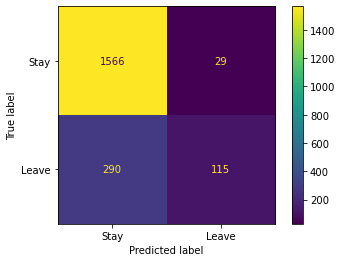

In [7]:
# Artificial Neural Network
# Part 4 - Making predictions and evaluating the model

# Predicting the Test set results
# This gives a vector of probablities of Customers leaving the bank
# You can rank the probabilities of customers most likely to leave the bank
y_pred = classifier.predict(x_test)


# Choose a threshold of which customers leave or stay (use 50% as a starting threshold)
# This line converts probabilities into True/False
y_pred = (y_pred > 0.5)


# Predicting a single new observation
# Predict if the customer with the following informations will leave the bank:
# Geography: France
# Credit Score: 600
# Gender: Male
# Age: 40
# Tenure: 3
# Balance: 60000
# Number of Products: 2
# Has Credit Card: Yes
# Is Active Member: Yes
# Estimated Salary: 50000
# sc.transform Feature Scales the new prediction so the model will understand it
# Set 1 element as a float64 to set all to float64

# Change this sample input to test a new prediction
sample_input = [0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]

new_prediction = classifier.predict(sc.transform(np.array([sample_input])))
new_prediction = (new_prediction > 0.5)

# Making the Confusion Matrix
# Tells you the number of correct vs. incorrect observations
# In the Confusion Matrix we get [1,1] + [2,2] Correct Predictions
# In the Confusion Matrix we get [1,2] + [2,1] Incorrect Predictions
# Compute accuracy = correct predictions / total predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

cls = ['Stay','Leave']
cm_display = ConfusionMatrixDisplay(cm, display_labels=cls).plot()

# Measure accuracy percentage of the Training Set
accuracy = (cm[0,0] + cm[1,1])/2000*100

print('This model was trained with an accuracy of', accuracy, '%\n')

print('For a new sample input:\n', sample_input, '\n')

print('Prediction - Will this customer leave the Bank?\n', 'Result = ', new_prediction, '\n')